In [1]:
#Import Libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

The equation of the regression model is: y = 72965.25 + 23286.56 * x


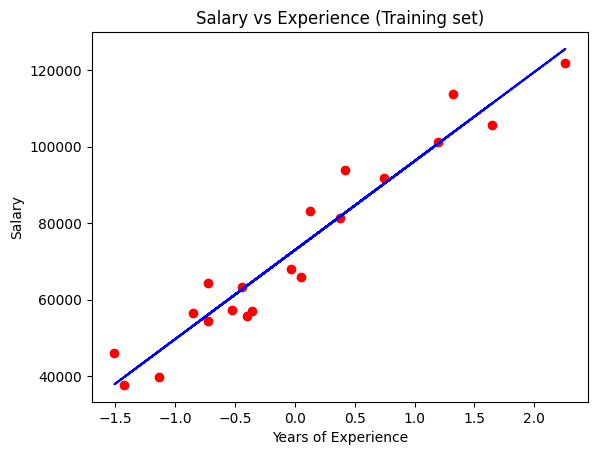

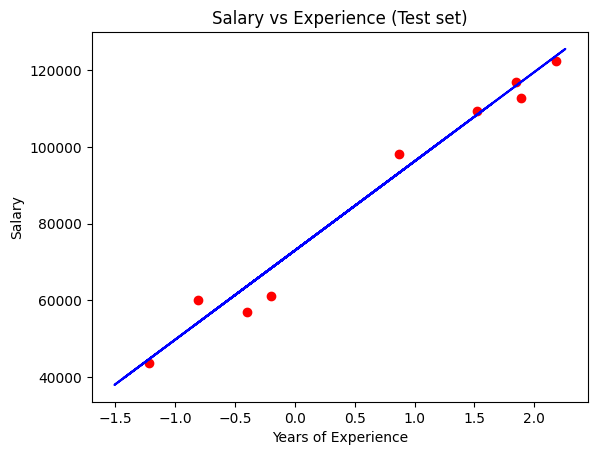

In [44]:
##LINEAR REGRESSION MODEL

df_simple = pd.read_csv('Simple-Linear-Dataset(Sheet1).csv')
X = df_simple.iloc[:, :1].values
Y = df_simple.iloc[:, -1].values


# # Splitting the dataset into the Training set and Test set
# # --------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3,random_state=0)

# # Feature scaling standardizes the year range from 1.1-10.5 to -1.5 - 2.0
# # ---------------
sc_X = StandardScaler(with_mean= True)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
# print(X_train, X_test, y_train, y_test)

# # Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

# Defining variables for regression model equation.
coefficients = regressor.coef_
intercept = regressor.intercept_

# Print the equation of the regression model
print(f"The equation of the regression model is: y = {intercept:.2f} + {coefficients[0]:.2f} * x")

# # Predicting the test set results
y_pred = regressor.predict(X_test)

# Visualising the Training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# # Visualising the Test set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


In [43]:
#MULTIPLE LINEAR REGRESSION MODEL
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

df_multi = pd.read_csv("Multivariable Data Set(Sheet1).csv")
X = df_multi.iloc[:, :-1].values
y = df_multi.iloc[:, 4].values

labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])

X = ct.fit_transform(X)

# Avoiding the Dummy Variable Trap
X = X[:, 1:]  # Avoiding the dummy variable trap by removing one dummy variable

# Splitting the dataset into the Training set and Test set
# --------------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Remove non-numeric columns if any
X = X.astype(float)
y = y.astype(float)

# Add constant column for intercept
X = sm.add_constant(X)

# Building the optimal model using Backward Elimination
import statsmodels.api as sm

# Adding a column of ones to X to include the intercept in the model
X = np.append(arr=np.ones((X.shape[0], 1)).astype(int), values=X, axis=1)

# Building the optimal model using Backward Elimination
import statsmodels.api as sm
X = np.append(arr=np.ones((50, 1)).astype(int), values=X, axis=1)

#Selecting index, Product 1, and Product 3 from dataset
X_opt = X[:, [0, 1, 4]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6575
Date:                Thu, 12 Sep 2024   Prob (F-statistic):              0.421
Time:                        17:20:08   Log-Likelihood:                -600.31
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.442e+04   3468.370     15.689      0.000    4.74e+04    6.14e+04
x1          5.442e+04   3468.370     15.689      0.000    4.74e+04    6.14e+04
x2          9943.2212   1.23e+04      0.811      0.421   -1.47e+04    3.46e+04
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.123
Skew:                           0.080   Prob(JB):                        0.940
Kurtosis:                       2.817   Cond. No.                     1.07e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.16e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

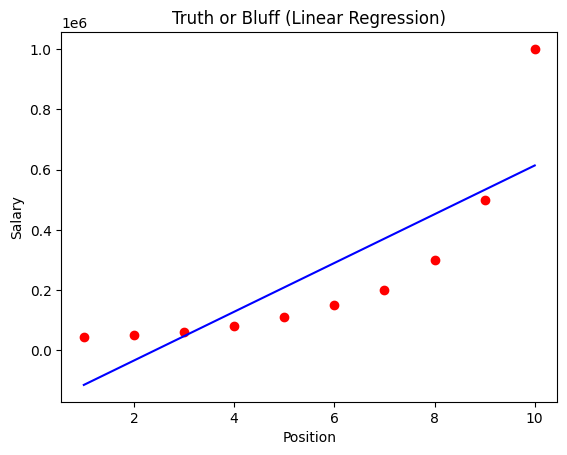

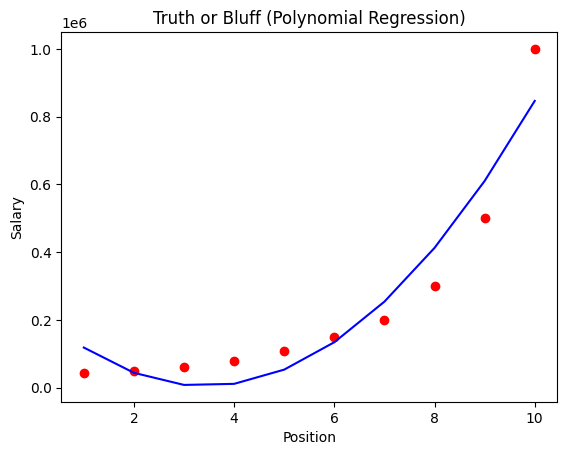

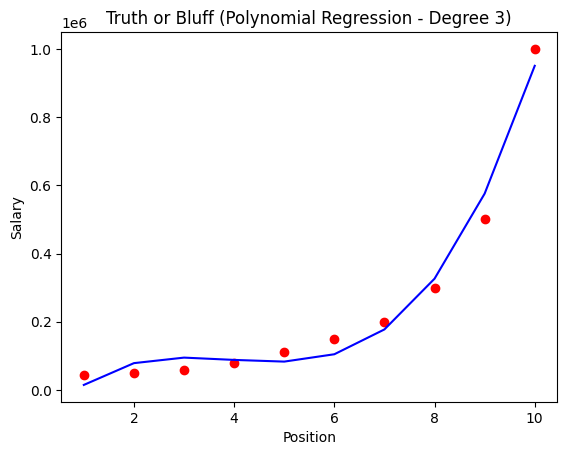

/var/folders/bv/pfszzv110gjdck_cpdk76h980000gn/T/ipykernel_65500/2986096887.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


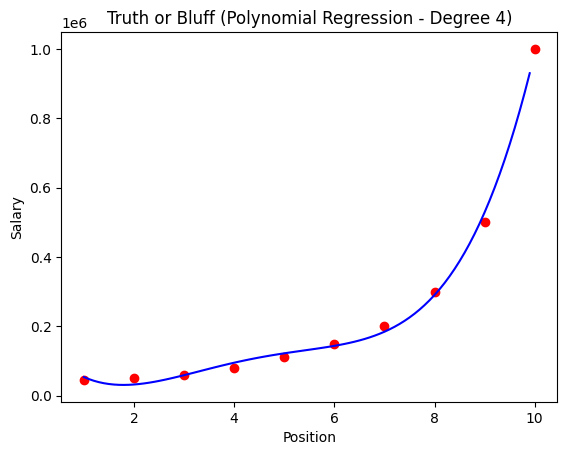

Salary at level 6.5 = [158862.45265155]


In [45]:
## POLYNOMIAL MODEL
# Importing the dataset
# ---------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

dataset = pd.read_csv('Polynomial Dataset.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Fitting Polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

# Visualising the Linear Regression results
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

# Visualising the Polynomial Regression results
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

# Fitting Polynomial Regression to the dataset with degree=3
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly, y)

# Visualising the Polynomial Regression results with degree=3
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_3.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression - Degree 3)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

# Fitting Polynomial Regression to the dataset with degree=4
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_poly, y)

# Visualising the Polynomial Regression results with degree=4
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg_4.predict(poly_reg.fit_transform(X_grid)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression - Degree 4)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

# Predicting a new result with Linear Regression
lin_reg.predict(np.array([[6.5]]))

# Predicting a new result with Polynomial Regression
h = lin_reg_4.predict(poly_reg.fit_transform(np.array([[6.5]])))
print( f"Salary at level 6.5 = {h}")
